In [1]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
import mca
import prince

In [21]:
activity = pd.read_csv('original_data/activity.csv')
survey = pd.read_csv('original_data/survey_clear.csv')

In [22]:
activity = activity.dropna()

In [23]:
activity_survey = pd.merge(activity, survey, on=['egoid'])
activity_survey.to_csv('merged_data/activity_survey.csv', index=False)

# activity_survey = pd.read_csv('merged_data/activity_survey.csv')

In [24]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = []
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.append((cols[i], cols[j], df.iat[i, j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    abs_corr = df.corr().abs()
    # au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(abs_corr)
    return sorted(labels_to_drop, key=lambda tup: tup[2], reverse=True)
    # au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    # return au_corr[0:n]

In [25]:
c1 = get_top_abs_correlations(activity_survey)
c1

[('egoid', 'egoid', 1.0),
 ('complypercent', 'complypercent', 1.0),
 ('meanrate', 'meanrate', 1.0),
 ('sdrate', 'sdrate', 1.0),
 ('steps', 'steps', 1.0),
 ('floors', 'floors', 1.0),
 ('sedentaryminutes', 'sedentaryminutes', 1.0),
 ('lightlyactiveminutes', 'lightlyactiveminutes', 1.0),
 ('fairlyactiveminutes', 'fairlyactiveminutes', 1.0),
 ('veryactiveminutes', 'veryactiveminutes', 1.0),
 ('lowrangemins', 'lowrangemins', 1.0),
 ('fatburnmins', 'fatburnmins', 1.0),
 ('cardiomins', 'cardiomins', 1.0),
 ('peakmins', 'peakmins', 1.0),
 ('lowrangecal', 'lowrangecal', 1.0),
 ('fatburncal', 'fatburncal', 1.0),
 ('cardiocal', 'cardiocal', 1.0),
 ('peakcal', 'peakcal', 1.0),
 ('hsclub1rc_1', 'hsclub1rc_1', 1.0),
 ('hsclub2rc_1', 'hsclub2rc_1', 1.0),
 ('hsclub3rc_1', 'hsclub3rc_1', 1.0),
 ('hsclub4rc_1', 'hsclub4rc_1', 1.0),
 ('dadage_1', 'dadage_1', 1.0),
 ('momage_1', 'momage_1', 1.0),
 ('numbros_1', 'numbros_1', 1.0),
 ('numsis_1', 'numsis_1', 1.0),
 ('numsib_1', 'numsib_1', 1.0),
 ('dad_multi

In [27]:
high_c = [
('peakcal', 'peakmins', 0.9615162426947763),
 ('cardiocal', 'cardiomins', 0.9596207340630062),
 ('lowrangemins', 'complypercent', 0.9365984957904345),
 ('BDIgroup_7', 'BDIsum_7', 0.8932375633592324),
 ('fatburncal', 'fatburnmins', 0.8731220918740693),
 ('Extraversion_1', 'BigFive_21_1', 0.8374795735674847),
 ('SelfEsteem_1', 'SelfEsteem_2_1', 0.8199610120752856),
 ('SelfEsteem_1', 'SelfEsteem_10_1', 0.8176713770220104),
 ('Extraversion_1', 'BigFive_36_1', 0.8112984941630981),
 ('Extraversion_1', 'BigFive_6_1', 0.8039082331596393),
 ('Extraversion_1', 'BigFive_1_1', 0.8032887363789627),
 ('CESDOverall_2', 'BDIsum_2', 0.7966401234458459),
 ('SelfEff_diet_scale_1', 'SelfEff_diet_27_1', 0.7849335711220611),
 ('Neuroticism_1', 'BigFive_9_1', 0.7839693312699025),
 ('CESDOverall_2', 'STAITraitTotal_2', 0.78073180062147),
 ('fatburncal', 'fairlyactiveminutes', 0.778540504815979),
 ('BigFive_21_1', 'BigFive_6_1', 0.7779144373273373),
 ('SelfEsteem_1', 'SelfEsteem_8_1', 0.7729637238790424),
 ('SelfEsteem_1', 'SelfEsteem_9_1', 0.7658927286384827),
 ('SelfEff_exercise_scale_1', 'SelfEff_exercise_17_1', 0.7633100540029819),
 ('SelfEff_diet_scale_1', 'SelfEff_diet_18_1', 0.7570701101880988),
 ('SRQE_Intrin_1', 'SRQE_Ident_1', 0.7541680489983145),
 ('lowrangecal', 'lowrangemins', 0.7510515038188093),
 ('SRQE_RAI_1', 'SRQE_Intrin_1', 0.7493148624437954),
 ('SelfEsteem_1', 'SelfEsteem_6_1', 0.7466357641122467),
 ('STAITraitTotal_2', 'BDIsum_2', 0.7447701766989832),
 ('PSQI_duration_2', 'PSQI4_2', 0.7414959523059337),
 ('SelfEsteem_1', 'SelfEsteem_5_1', 0.7395606999806106),
 ('Conscientiousness_1', 'BigFive_23_1', 0.7366619046290107),
 ('SelfEsteem_1', 'SelfEsteem_1_1', 0.7365292831123756),
 ('Neuroticism_1', 'BigFive_19_1', 0.7345140467989518),
 ('SelfEff_diet_scale_1', 'SelfEff_diet_14_1', 0.7272496794431598),
 ('Extraversion_1', 'BigFive_31_1', 0.7226972984863838),
 ('SelfEff_exercise_8_1', 'SelfEff_exercise_4_1', 0.7216136951038347),
 ('SelfEff_diet_scale_1', 'SelfEff_diet_17_1', 0.7173219267462163),
 ('Neuroticism_1', 'BigFive_24_1', 0.7166352758142258),
 ('Openness_1', 'BigFive_44_1', 0.7142718311855214),
 ('SelfEff_diet_scale_1', 'SelfEff_diet_16_1', 0.712497638685117),
 ('SelfEff_exercise_6_1', 'SelfEff_exercise_5_1', 0.7122110579689982),
 ('SelfEff_exercise_scale_1', 'SelfEff_exercise_11_1', 0.7087065694276891),
 ('SelfEff_exercise_scale_1', 'SelfEff_exercise_5_1', 0.7070918198374998),
 ('SelfEff_exercise_scale_1', 'SelfEff_exercise_12_1', 0.7069163211972396),
 ('SelfEff_diet_scale_1', 'SelfEff_diet_11_1', 0.7067473956875846),
 ('veryactiveminutes', 'steps', 0.7063991669190346),
 ('SelfEff_exercise_scale_1', 'SelfEff_exercise_1_1', 0.7063181414825741),
 ('SelfEff_diet_scale_1', 'SelfEff_diet_12_1', 0.7045838194894044),
]

In [30]:
for column1, column2, value in high_c:
    if column1 in activity_survey.columns:
        activity_survey.drop(columns=[column1], inplace=True)
    

In [37]:
activity_survey.drop(columns=['egoid'], inplace=True)

In [32]:
for column in activity_survey:
    print(activity_survey.dtypes)

egoid              int64
datadate          object
complypercent      int64
meanrate         float64
sdrate           float64
                  ...   
BDI21_2_7         object
BDI21_3_7         object
BDI21_4_7         object
BDIsum_7           int64
reshallyear1     float64
Length: 542, dtype: object
egoid              int64
datadate          object
complypercent      int64
meanrate         float64
sdrate           float64
                  ...   
BDI21_2_7         object
BDI21_3_7         object
BDI21_4_7         object
BDIsum_7           int64
reshallyear1     float64
Length: 542, dtype: object
egoid              int64
datadate          object
complypercent      int64
meanrate         float64
sdrate           float64
                  ...   
BDI21_2_7         object
BDI21_3_7         object
BDI21_4_7         object
BDIsum_7           int64
reshallyear1     float64
Length: 542, dtype: object
egoid              int64
datadate          object
complypercent      int64
meanrate         fl

In [38]:

activity_survey = activity_survey.select_dtypes(include=['int64', 'float64'])
normalized_activity_survey = (activity_survey-activity_survey.mean())/activity_survey.std()


In [39]:

cov_matrix = normalized_activity_survey.cov()
cov_matrix

,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,fatburnmins,cardiomins,...,selsa_rom_2,selsa_fam_2,selsa_soc_2,HealthSatisfactionScale_2,BDIsum_2,PSQI2_2,PSQI4_2,MEQTotal_2,BDIsum_7,reshallyear1
complypercent,1.000000,-0.169573,0.179080,0.343364,0.154545,-0.587600,0.425613,0.183683,0.220686,0.068308,...,0.002877,-0.009367,0.000765,0.032827,-0.001092,-0.040131,-0.005140,0.021418,0.047367,-0.019835
meanrate,-0.169573,1.000000,0.119701,0.170464,0.058510,0.082080,0.164577,0.261870,0.664723,0.052396,...,-0.044862,0.107625,-0.008115,-0.161262,0.073044,0.049307,-0.023554,-0.087971,0.072964,0.136759
sdrate,0.179080,0.119701,1.000000,0.557587,0.250411,-0.260515,0.193552,0.464290,0.393342,0.542021,...,-0.014248,-0.043118,-0.008406,0.148293,-0.052862,-0.002976,0.014141,0.128877,-0.020899,-0.057613
steps,0.343364,0.170464,0.557587,1.000000,0.447344,-0.353647,0.491814,0.542232,0.432147,0.362635,...,-0.017609,-0.036467,-0.021241,0.116476,-0.029725,-0.025838,-0.021986,0.121134,-0.034941,-0.005763
floors,0.154545,0.058510,0.250411,0.447344,1.000000,-0.145245,0.195469,0.246765,0.176895,0.150660,...,-0.013015,-0.017531,-0.011171,0.099685,-0.032884,-0.010969,0.013822,0.060079,-0.026542,-0.033676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSQI2_2,-0.040131,0.049307,-0.002976,-0.025838,-0.010969,0.036350,-0.032766,-0.015025,0.010854,0.002131,...,0.086200,0.177826,0.067712,-0.103224,0.168121,1.000000,-0.163232,-0.113239,0.011675,-0.018996
PSQI4_2,-0.005140,-0.023554,0.014141,-0.021986,0.013822,-0.039392,-0.048651,-0.008202,0.000784,0.029048,...,-0.129855,-0.167427,-0.058728,0.183630,-0.310625,-0.163232,1.000000,0.106783,-0.057133,-0.010786
MEQTotal_2,0.021418,-0.087971,0.128877,0.121134,0.060079,-0.059782,0.041521,0.012631,-0.033747,0.139139,...,-0.072092,-0.138040,0.002198,0.253933,-0.139201,-0.113239,0.106783,1.000000,-0.018262,0.049517
BDIsum_7,0.047367,0.072964,-0.020899,-0.034941,-0.026542,-0.010608,-0.000346,-0.030859,0.043235,-0.006856,...,0.023419,0.266287,0.089579,-0.216384,0.279551,0.011675,-0.057133,-0.018262,1.000000,0.059268


In [40]:
from numpy.linalg import eig

us_egnvalues, us_egnvectors = eig(cov_matrix)

total_egnvalues = sum(us_egnvalues)

var_exp = [(i/total_egnvalues) for i in sorted(us_egnvalues, reverse=True)]

In [41]:
cov_dict = {}
for index, column in enumerate(activity_survey.columns):
    cov_dict[column] = us_egnvalues[index]
    print(us_egnvalues[index], '\t', column)

19.170310839956148 	 complypercent
8.203691607586052 	 meanrate
5.670875504127024 	 sdrate
5.251924629213708 	 steps
4.645200514032768 	 floors
4.098372107272293 	 sedentaryminutes
3.7870514006973717 	 lightlyactiveminutes
3.384260390193585 	 fairlyactiveminutes
2.910633280089792 	 fatburnmins
2.554906328357737 	 cardiomins
2.420689294380683 	 peakmins
2.223138224777507 	 hsclub1rc_1
2.187964803144058 	 hsclub2rc_1
2.075527927783771 	 hsclub3rc_1
1.9636743299011188 	 hsclub4rc_1
1.8569429078286166 	 dadage_1
1.8047141628508487 	 momage_1
1.7870992570748618 	 numbros_1
1.749797576703784 	 numsis_1
1.6924846782482417 	 numsib_1
1.6408054598400852 	 dad_multiracial_1
1.5733600832848833 	 mom_multiracial_1
1.5542309539562549 	 BigFive_1_1
1.496882356855049 	 BigFive_2_1
1.4502557814189905 	 BigFive_3_1
1.3784390664808774 	 BigFive_4_1
1.3606786868189622 	 BigFive_5_1
1.354771070286682 	 BigFive_6_1
1.2785023394359252 	 BigFive_7_1
1.2864107416450294 	 BigFive_8_1
1.2492294379068092 	 BigFi

In [42]:
sorted_columns = activity_survey.columns[np.argsort(us_egnvalues)][::-1]
sorted_columns

Index(['complypercent', 'meanrate', 'sdrate', 'steps', 'floors',
       'sedentaryminutes', 'lightlyactiveminutes', 'fairlyactiveminutes',
       'fatburnmins', 'cardiomins',
       ...
       'SelfEff_exercise_9_1', 'SelfEff_exercise_5_1', 'SelfEff_exercise_3_1',
       'SRQE_Ext_1', 'SRQE_Introj_1', 'SelfEsteem_9_1', 'SelfEsteem_8_1',
       'Trust_6_1', 'Trust_5_1', 'Trust_4_1'],
      dtype='object', length=145)

In [43]:
eig_vector_row = np.transpose(us_egnvectors)
eig_vector_row

array([[-2.10381352e-04,  3.97137139e-02, -3.35077389e-02, ...,
        -4.76303618e-02,  4.82254153e-02,  5.55291668e-02],
       [-9.57109841e-03, -6.89729069e-03, -1.57361864e-04, ...,
         4.41604155e-05,  1.12390386e-01,  3.96771448e-02],
       [-3.99249802e-02,  3.16659576e-02, -9.08909495e-02, ...,
        -7.49683572e-02,  8.16062382e-02,  3.73095005e-02],
       ...,
       [-7.20706880e-02, -8.41707709e-03,  7.18349387e-02, ...,
         8.52330568e-02,  6.84087114e-02, -2.80925135e-02],
       [ 1.82291455e-02,  4.66949890e-02, -2.60801322e-01, ...,
         6.83268824e-02, -3.79864492e-02, -7.41282522e-02],
       [-4.72362917e-03,  1.00557912e-01,  6.89994814e-02, ...,
        -6.12561710e-02, -1.43257917e-02,  7.75145409e-02]])

In [44]:
cum_var = []
step_var = []
_index = 0
for column, egn_val in sorted(cov_dict.items(), key = lambda kv:(kv[1],kv[0]), reverse=True):
    step_var.append(egn_val/total_egnvalues)
    if _index > 0:
        cum_var.append(egn_val/total_egnvalues + cum_var[_index - 1])
    else:
        cum_var.append(egn_val/total_egnvalues)
    _index += 1

print(total_egnvalues)
print(cum_var)

145.00000000000028
[0.13220904027555938, 0.18878622377615273, 0.22789571001151143, 0.2641158798681576, 0.2961517454821766, 0.3244163807047441, 0.3505339765716225, 0.3738737034005437, 0.39394703636668016, 0.4115670800105266, 0.4282614889372899, 0.4435934766943761, 0.45868288912985233, 0.4729968748387059, 0.4865394564242308, 0.49934595923684194, 0.5117922638082271, 0.5241170862708123, 0.5361846557653211, 0.5478569638911711, 0.5591728636142062, 0.5700236228092743, 0.5807424569744899, 0.5910657835734903, 0.6010675475832764, 0.6105740239038342, 0.6199580148474132, 0.629301263608011, 0.6381730618262526, 0.6469903193396037, 0.6556056947734438, 0.6639405680381189, 0.6721137713080979, 0.6798154843553434, 0.6874509862594748, 0.69503722539983, 0.7023501451899915, 0.7095614559530872, 0.7166051320478344, 0.7235520649581128, 0.7303617735442592, 0.73696892664684, 0.7435106169192424, 0.7497131616747402, 0.7558969871192747, 0.7619144025169559, 0.7677823390345856, 0.7735635833089822, 0.7793191818994591,

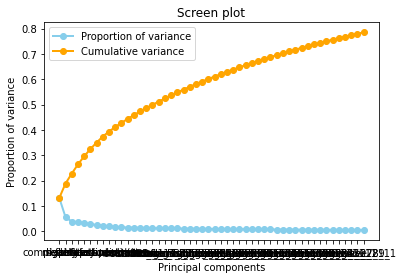

In [46]:
import matplotlib.pyplot as plt

x_labels = [column for column in cov_dict.keys()]

plt.plot(x_labels[0:50], step_var[0:50], marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels[0:50], cum_var[0:50], marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Screen plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()